<a href="https://colab.research.google.com/github/onesummer123/c2s4_BDAO_Project/blob/main/big_data_ima_clean_table_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
from google.colab import auth
auth.authenticate_user()

from google.cloud import storage
from google.cloud import bigquery

project_id = "c2s4-project"
dataset_name = "restaurant_dataset_1"
table_name = "restaurant_data"

bigquery_client = bigquery.Client(project=project_id)

In [197]:
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
restaurant_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
0,doN8QSdGtlIAW7BP8afZEg,McDonald's,109 E Hwy 50,O'Fallon,IL,62269,38.584549,-89.909163,1.5,45,...,None,"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,False
1,e8VlQHJYDyfMo5J--qyY9g,Krispy Kreme,3113 W Kennedy Blvd,Tampa,FL,33609,27.945087,-82.493933,3.0,87,...,'average',None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
2,dRNrAjTbe9DCdpJUIW4c0g,Mr Lee's Asian Gourmet,1134 N Gravel Pike,Zieglerville,PA,19492,40.275734,-75.478052,3.5,27,...,'average',None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
3,2l1rAQ3tonK68LQEKtEiGA,The Market at Del Val,2100 Lower State Rd,Doylestown,PA,18901,40.293535,-75.150953,4.0,16,...,None,None,False,None,None,<NA>,None,<NA>,<NA>,True
4,cHrzPYXVLd1BEXWqi6Ug6Q,Ark Brewery,106 Ark Rd,Lumberton,NJ,08048,39.941709,-74.852849,3.0,35,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True


In [198]:
import pandas as pd

restuarnt_df = restaurant_df.drop_duplicates()

restaurant_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
0,doN8QSdGtlIAW7BP8afZEg,McDonald's,109 E Hwy 50,O'Fallon,IL,62269,38.584549,-89.909163,1.5,45,...,None,"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,False
1,e8VlQHJYDyfMo5J--qyY9g,Krispy Kreme,3113 W Kennedy Blvd,Tampa,FL,33609,27.945087,-82.493933,3.0,87,...,'average',None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
2,dRNrAjTbe9DCdpJUIW4c0g,Mr Lee's Asian Gourmet,1134 N Gravel Pike,Zieglerville,PA,19492,40.275734,-75.478052,3.5,27,...,'average',None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
3,2l1rAQ3tonK68LQEKtEiGA,The Market at Del Val,2100 Lower State Rd,Doylestown,PA,18901,40.293535,-75.150953,4.0,16,...,None,None,False,None,None,<NA>,None,<NA>,<NA>,True
4,cHrzPYXVLd1BEXWqi6Ug6Q,Ark Brewery,106 Ark Rd,Lumberton,NJ,08048,39.941709,-74.852849,3.0,35,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True


In [199]:
restaurant_df = restaurant_df.drop(columns=['postal_code', 'address','hours'])
restaurant_df

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,attributes,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
0,doN8QSdGtlIAW7BP8afZEg,McDonald's,O'Fallon,IL,38.584549,-89.909163,1.5,45,1,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...",...,None,"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,False
1,e8VlQHJYDyfMo5J--qyY9g,Krispy Kreme,Tampa,FL,27.945087,-82.493933,3.0,87,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...",...,'average',None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
2,dRNrAjTbe9DCdpJUIW4c0g,Mr Lee's Asian Gourmet,Zieglerville,PA,40.275734,-75.478052,3.5,27,1,"{'NoiseLevel': ""u'average'"", 'GoodForKids': 'T...",...,'average',None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
3,2l1rAQ3tonK68LQEKtEiGA,The Market at Del Val,Doylestown,PA,40.293535,-75.150953,4.0,16,0,"{'BikeParking': 'True', 'RestaurantsPriceRange...",...,None,None,False,None,None,<NA>,None,<NA>,<NA>,True
4,cHrzPYXVLd1BEXWqi6Ug6Q,Ark Brewery,Lumberton,NJ,39.941709,-74.852849,3.0,35,1,"{'RestaurantsPriceRange2': '2', 'WiFi': ""u'fre...",...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52281,7Qcdxav_IcbDvn_oYAVsKw,Italian Gardens Restaurant,Indianapolis,IN,39.773836,-86.019973,3.0,35,0,"{'GoodForKids': 'True', 'RestaurantsReservatio...",...,'quiet',None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
52282,AsMmX7njOzFkWsJQ1jMVCg,The Boozy Pig,Tampa,FL,27.952304,-82.497093,4.5,134,1,"{'WheelchairAccessible': 'True', 'GoodForMeal'...",...,None,"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
52283,prjS_8VAw65e32UtoCj5AA,Seasons Pizza,Wilmington,DE,39.784551,-75.477870,2.0,28,1,"{'RestaurantsReservations': 'True', 'BusinessP...",...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
52284,Kyey3rqsPuNOgGlXuiqezQ,Chipotle Mexican Grill,Tampa,FL,27.893439,-82.505866,2.0,100,1,"{'BikeParking': 'True', 'WiFi': ""'no'"", 'Busin...",...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True


In [200]:
top_ten_state = ['PA','FL','LA','MO','TN','IN','AZ','NV','CA','NJ']
restaurant_df = restaurant_df[restaurant_df['state'].isin(top_ten_state)]

restaurant_df = restaurant_df

In [201]:
print(restaurant_df['RestaurantsDelivery'])
print(restaurant_df['RestaurantsDelivery'].isnull().sum())

1         True
2         True
3        False
4         <NA>
6         <NA>
         ...  
52279     True
52280     True
52281    False
52282     True
52284     True
Name: RestaurantsDelivery, Length: 46622, dtype: boolean
6491


In [202]:
all_columns = list(restaurant_df.columns)
standard_columns = ['business_id', 'name', 'address', 'city', 'state', 'postal_code',
                    'latitude', 'longitude', 'stars', 'review_count', 'is_open',
                    'categories','attributes']

attribute_related_columns = [col for col in all_columns if col not in standard_columns and not col.startswith('category_')]
attribute_non_empty_counts = restaurant_df[attribute_related_columns].notna().sum()
attribute_non_empty_counts_df = attribute_non_empty_counts.to_frame(name='Non-Empty Count')
sorted_attribute_non_empty_counts_df = attribute_non_empty_counts_df.sort_values(by='Non-Empty Count', ascending=False)
print(sorted_attribute_non_empty_counts_df)

                            Non-Empty Count
RestaurantsTakeOut                    42493
BusinessAcceptsCreditCards            42454
Parking                               40870
BusinessParking                       40241
RestaurantsDelivery                   40131
RestaurantsPriceRange2                39804
RestaurantsReservations               38222
OutdoorSeating                        37449
HasTV                                 37387
RestaurantsGoodForGroups              36941
Ambience                              36658
GoodForKids                           36506
Alcohol                               35844
RestaurantsAttire                     34764
WiFi                                  33771
BikeParking                           31700
NoiseLevel                            31160
Caters                                31028
GoodForMeal                           25593
RestaurantsTableService               17807
WheelchairAccessible                  12269
HappyHour                       

In [203]:
restaurant_df = restaurant_df.dropna(subset=['attributes'])
print(restaurant_df['attributes'].isnull().sum())
restaurant_df

0


,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,attributes,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
1,e8VlQHJYDyfMo5J--qyY9g,Krispy Kreme,Tampa,FL,27.945087,-82.493933,3.0,87,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...",...,'average',None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
2,dRNrAjTbe9DCdpJUIW4c0g,Mr Lee's Asian Gourmet,Zieglerville,PA,40.275734,-75.478052,3.5,27,1,"{'NoiseLevel': ""u'average'"", 'GoodForKids': 'T...",...,'average',None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
3,2l1rAQ3tonK68LQEKtEiGA,The Market at Del Val,Doylestown,PA,40.293535,-75.150953,4.0,16,0,"{'BikeParking': 'True', 'RestaurantsPriceRange...",...,None,None,False,None,None,<NA>,None,<NA>,<NA>,True
4,cHrzPYXVLd1BEXWqi6Ug6Q,Ark Brewery,Lumberton,NJ,39.941709,-74.852849,3.0,35,1,"{'RestaurantsPriceRange2': '2', 'WiFi': ""u'fre...",...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
6,QMNGweCNIS4kYrUrUCPsuA,New China,Odessa,FL,28.127300,-82.574565,3.0,15,1,{'RestaurantsReservations': 'True'},...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52279,aTrMhh9GzzZo5cN0pFmdtg,Blaze Pizza,Lutz,FL,28.192855,-82.395125,4.5,128,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...",...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
52280,3u_cGb3avKVZ_HaEuXEJfw,MOD Pizza,Tucson,AZ,32.163906,-110.990760,4.0,27,1,"{'Ambience': ""{'touristy': False, 'hipster': F...",...,None,"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
52281,7Qcdxav_IcbDvn_oYAVsKw,Italian Gardens Restaurant,Indianapolis,IN,39.773836,-86.019973,3.0,35,0,"{'GoodForKids': 'True', 'RestaurantsReservatio...",...,'quiet',None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
52282,AsMmX7njOzFkWsJQ1jMVCg,The Boozy Pig,Tampa,FL,27.952304,-82.497093,4.5,134,1,"{'WheelchairAccessible': 'True', 'GoodForMeal'...",...,None,"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True


In [204]:
columns_to_drop = [
    'RestaurantsTableService', 'WheelchairAccessible', 'HappyHour','categories',
    'DogsAllowed', 'BusinessAcceptsBitcoin', 'DriveThru', 'Music',
    'BestNights', 'CoatCheck', 'BYOB', 'GoodForDancing', 'Smoking',
    'Corkage', 'ByAppointmentOnly','GoodForMeal','attributes','BusinessParking','Ambience'
]
restaurant_df = restaurant_df.drop(columns=columns_to_drop)
restaurant_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,category_AcaiBowls,...,WiFi,Alcohol,Caters,RestaurantsAttire,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking
1,e8VlQHJYDyfMo5J--qyY9g,Krispy Kreme,Tampa,FL,27.945087,-82.493933,3.0,87,1,0,...,'free',None,False,None,<NA>,True,<NA>,<NA>,'average',True
2,dRNrAjTbe9DCdpJUIW4c0g,Mr Lee's Asian Gourmet,Zieglerville,PA,40.275734,-75.478052,3.5,27,1,0,...,None,None,<NA>,'casual',True,True,<NA>,True,'average',<NA>
3,2l1rAQ3tonK68LQEKtEiGA,The Market at Del Val,Doylestown,PA,40.293535,-75.150953,4.0,16,0,0,...,'no',None,True,None,<NA>,<NA>,<NA>,<NA>,None,True
4,cHrzPYXVLd1BEXWqi6Ug6Q,Ark Brewery,Lumberton,NJ,39.941709,-74.852849,3.0,35,1,0,...,'free',None,<NA>,None,<NA>,<NA>,<NA>,True,None,True
6,QMNGweCNIS4kYrUrUCPsuA,New China,Odessa,FL,28.127300,-82.574565,3.0,15,1,0,...,None,None,<NA>,None,True,<NA>,<NA>,<NA>,None,<NA>


In [205]:
columns_to_bool = [
    'RestaurantsDelivery','OutdoorSeating','BusinessAcceptsCreditCards','BikeParking','RestaurantsTakeOut','Caters',
    'RestaurantsReservations','RestaurantsGoodForGroups','HasTV','Parking'
  ]

for column in columns_to_bool:
   restaurant_df[column] = restaurant_df[column].fillna(False).astype(bool)
   restaurant_df[column] = restaurant_df[column].replace({True: 1, False: 0}).astype(int)

restaurant_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,category_AcaiBowls,...,WiFi,Alcohol,Caters,RestaurantsAttire,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking
1,e8VlQHJYDyfMo5J--qyY9g,Krispy Kreme,Tampa,FL,27.945087,-82.493933,3.0,87,1,0,...,'free',None,0,None,0,True,0,0,'average',1
2,dRNrAjTbe9DCdpJUIW4c0g,Mr Lee's Asian Gourmet,Zieglerville,PA,40.275734,-75.478052,3.5,27,1,0,...,None,None,0,'casual',1,True,0,1,'average',0
3,2l1rAQ3tonK68LQEKtEiGA,The Market at Del Val,Doylestown,PA,40.293535,-75.150953,4.0,16,0,0,...,'no',None,1,None,0,<NA>,0,0,None,1
4,cHrzPYXVLd1BEXWqi6Ug6Q,Ark Brewery,Lumberton,NJ,39.941709,-74.852849,3.0,35,1,0,...,'free',None,0,None,0,<NA>,0,1,None,1
6,QMNGweCNIS4kYrUrUCPsuA,New China,Odessa,FL,28.127300,-82.574565,3.0,15,1,0,...,None,None,0,None,1,<NA>,0,0,None,0


In [206]:
mode_price_range = restaurant_df['RestaurantsPriceRange2'].mode()[0]

restaurant_df['RestaurantsPriceRange2'].fillna(mode_price_range, inplace=True)

def map_price_to_label(price):
    if price == 1:
        return 'low'
    elif price == 2:
        return 'medium'
    elif price in [3, 4]:
        return 'high'
    return 'unknown'

restaurant_df['PriceRangeLabel'] = restaurant_df['RestaurantsPriceRange2'].map(map_price_to_label)
restaurant_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,category_AcaiBowls,...,Alcohol,Caters,RestaurantsAttire,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking,PriceRangeLabel
1,e8VlQHJYDyfMo5J--qyY9g,Krispy Kreme,Tampa,FL,27.945087,-82.493933,3.0,87,1,0,...,None,0,None,0,True,0,0,'average',1,low
2,dRNrAjTbe9DCdpJUIW4c0g,Mr Lee's Asian Gourmet,Zieglerville,PA,40.275734,-75.478052,3.5,27,1,0,...,None,0,'casual',1,True,0,1,'average',0,medium
3,2l1rAQ3tonK68LQEKtEiGA,The Market at Del Val,Doylestown,PA,40.293535,-75.150953,4.0,16,0,0,...,None,1,None,0,<NA>,0,0,None,1,medium
4,cHrzPYXVLd1BEXWqi6Ug6Q,Ark Brewery,Lumberton,NJ,39.941709,-74.852849,3.0,35,1,0,...,None,0,None,0,<NA>,0,1,None,1,medium
6,QMNGweCNIS4kYrUrUCPsuA,New China,Odessa,FL,28.127300,-82.574565,3.0,15,1,0,...,None,0,None,1,<NA>,0,0,None,0,medium


In [207]:
wifi_mapping = {'free': 1, 'no': 0}
restaurant_df['WiFi'] = restaurant_df['WiFi'].map(wifi_mapping)
restaurant_df['WiFi'].fillna(-1, inplace=True)
restaurant_df['WiFi'] = restaurant_df['WiFi'].astype(int)
print(restaurant_df[['WiFi']].head())

   WiFi
1    -1
2    -1
3    -1
4    -1
6    -1


In [208]:
restaurant_df['Alcohol'] = restaurant_df['Alcohol'].notna().astype(int)
print(restaurant_df[['Alcohol']].head())

   Alcohol
1        0
2        0
3        0
4        0
6        0


In [209]:
print("Original Data:")
print(restaurant_df['RestaurantsAttire'].head(10))


mode_attire = restaurant_df['RestaurantsAttire'].mode()[0]
print("Mode attire:", mode_attire)


restaurant_df['RestaurantsAttire'].replace([None, 'None', 'null', ''], mode_attire, inplace=True)


restaurant_df['RestaurantsAttire'] = restaurant_df['RestaurantsAttire'].astype(str)


attire_mapping = {'casual': 0, 'dressy': 1, 'formal': 2}


print("Data before mapping:")
print(restaurant_df['RestaurantsAttire'].value_counts())


restaurant_df['RestaurantsAttire'] = restaurant_df['RestaurantsAttire'].map(attire_mapping)


restaurant_df['RestaurantsAttire'].fillna(0, inplace=True)


restaurant_df['RestaurantsAttire'] = restaurant_df['RestaurantsAttire'].astype(int)


print("Updated Data:")
print(restaurant_df['RestaurantsAttire'].head())

Original Data:
1         None
2     'casual'
3         None
4         None
6         None
7         None
8         None
9     'casual'
11        None
12        None
Name: RestaurantsAttire, dtype: object
Mode attire: 'casual'
Data before mapping:
RestaurantsAttire
'casual'    45386
'dressy'      698
'formal'       62
Name: count, dtype: int64
Updated Data:
1    0
2    0
3    0
4    0
6    0
Name: RestaurantsAttire, dtype: int64


In [210]:
restaurant_df['GoodForKids'] = restaurant_df['GoodForKids'].map({True: 1, False: 0, None: -1})
restaurant_df['GoodForKids'].fillna(-1, inplace=True)
restaurant_df['GoodForKids'] = restaurant_df['GoodForKids'].astype(int)
print(restaurant_df[['GoodForKids']].head())

   GoodForKids
1            1
2            1
3           -1
4           -1
6           -1


In [211]:
value_counts = restaurant_df['NoiseLevel'].value_counts()
print(value_counts)

NoiseLevel
'average'      21956
'quiet'         6354
'loud'          2094
'very_loud'      756
Name: count, dtype: int64


In [212]:
noise_mapping = {
    'quiet': 0,
    'average': 1,
    'loud': 2,
    'very_loud': 3,
    None: -1  # 处理缺失值
}


restaurant_df['NoiseLevel'] = restaurant_df['NoiseLevel'].map(noise_mapping, na_action='ignore').fillna(-1).astype(int)

print(restaurant_df[['NoiseLevel']].head())

   NoiseLevel
1          -1
2          -1
3          -1
4          -1
6          -1


In [213]:
value_counts = restaurant_df['stars'].value_counts()
print(value_counts)

stars
4.0    11965
3.5    10432
4.5     7457
3.0     6673
2.5     4200
2.0     2544
5.0     1343
1.5     1320
1.0      212
Name: count, dtype: int64


In [214]:
mode_stars = restaurant_df['stars'].mode()[0]
restaurant_df['stars'].fillna(mode_stars, inplace=True)

restaurant_df['stars'] = restaurant_df['stars'].apply(lambda x: mode_stars if x < 1 or x > 5 else x)

restaurant_df['stars'] = restaurant_df['stars'].astype(float)

print(restaurant_df['stars'].describe())
print(restaurant_df['stars'].value_counts())

count    46146.000000
mean         3.520186
std          0.828159
min          1.000000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: stars, dtype: float64
stars
4.0    11965
3.5    10432
4.5     7457
3.0     6673
2.5     4200
2.0     2544
5.0     1343
1.5     1320
1.0      212
Name: count, dtype: int64


In [215]:
missing_values_count = restaurant_df.isnull().sum()
print(missing_values_count)

business_id                 0
name                        0
city                        0
state                       0
latitude                    0
                           ..
RestaurantsGoodForGroups    0
HasTV                       0
NoiseLevel                  0
Parking                     0
PriceRangeLabel             0
Length: 756, dtype: int64


In [216]:
project_id = "c2s4-project"
dataset_name = "restaurant_dataset_1"
table_name = "checkin_groupby_id_df"

bigquery_client = bigquery.Client(project=project_id)

query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

checkin_groupby_id_df = query_job.to_dataframe()
checkin_groupby_id_df.head()

,business_id,total_number_of_checkin
0,4B5ORibJ3vhimhW8LTY6Fg,256
1,4zQV6v8TwEYMwI9Ekdf19g,256
2,52ov7d0148JvYG78_c-Bsw,256
3,8PlUYO_9Q_c2ehidBhgvFg,256
4,B6Cn6maWQ6sLhLwYGLhSlg,256


In [217]:
cleaned_restaurant_data_1 = pd.merge(restaurant_df, checkin_groupby_id_df, on='business_id', how='inner')
cleaned_restaurant_data_1.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,category_AcaiBowls,...,Caters,RestaurantsAttire,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking,PriceRangeLabel,total_number_of_checkin
0,e8VlQHJYDyfMo5J--qyY9g,Krispy Kreme,Tampa,FL,27.945087,-82.493933,3.0,87,1,0,...,0,0,0,1,0,0,-1,1,low,435
1,dRNrAjTbe9DCdpJUIW4c0g,Mr Lee's Asian Gourmet,Zieglerville,PA,40.275734,-75.478052,3.5,27,1,0,...,0,0,1,1,0,1,-1,0,medium,5
2,2l1rAQ3tonK68LQEKtEiGA,The Market at Del Val,Doylestown,PA,40.293535,-75.150953,4.0,16,0,0,...,1,0,0,-1,0,0,-1,1,medium,54
3,cHrzPYXVLd1BEXWqi6Ug6Q,Ark Brewery,Lumberton,NJ,39.941709,-74.852849,3.0,35,1,0,...,0,0,0,-1,0,1,-1,1,medium,14
4,QMNGweCNIS4kYrUrUCPsuA,New China,Odessa,FL,28.127300,-82.574565,3.0,15,1,0,...,0,0,1,-1,0,0,-1,0,medium,13


In [218]:
value_counts = cleaned_restaurant_data_1['is_open'].value_counts()
print(value_counts)

is_open
1    30184
0    15187
Name: count, dtype: Int64


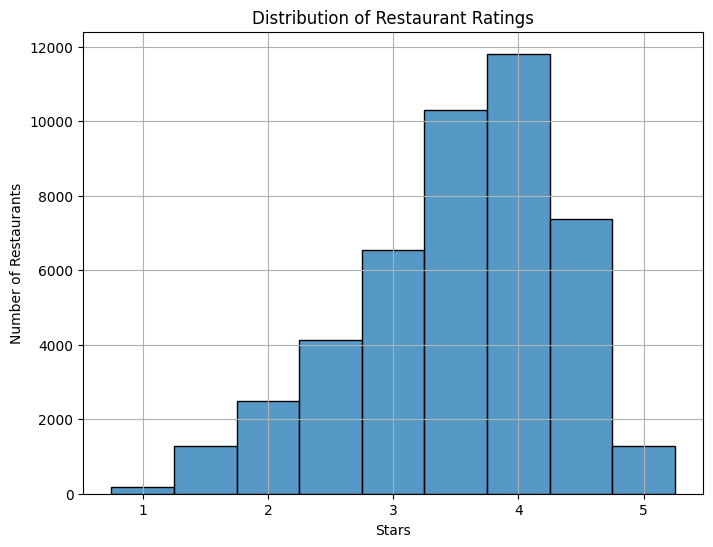

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(cleaned_restaurant_data_1['stars'],bins=[0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25], edgecolor='black')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Stars')
plt.ylabel('Number of Restaurants')
plt.grid(True)
plt.show()

In [220]:
cleaned_restaurant_data_open_only = cleaned_restaurant_data_1[cleaned_restaurant_data_1['is_open'] != 0]
cleaned_restaurant_data_open_only

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,category_AcaiBowls,...,Caters,RestaurantsAttire,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking,PriceRangeLabel,total_number_of_checkin
0,e8VlQHJYDyfMo5J--qyY9g,Krispy Kreme,Tampa,FL,27.945087,-82.493933,3.0,87,1,0,...,0,0,0,1,0,0,-1,1,low,435
1,dRNrAjTbe9DCdpJUIW4c0g,Mr Lee's Asian Gourmet,Zieglerville,PA,40.275734,-75.478052,3.5,27,1,0,...,0,0,1,1,0,1,-1,0,medium,5
3,cHrzPYXVLd1BEXWqi6Ug6Q,Ark Brewery,Lumberton,NJ,39.941709,-74.852849,3.0,35,1,0,...,0,0,0,-1,0,1,-1,1,medium,14
4,QMNGweCNIS4kYrUrUCPsuA,New China,Odessa,FL,28.127300,-82.574565,3.0,15,1,0,...,0,0,1,-1,0,0,-1,0,medium,13
6,dT_knPUzLKzfh2extWQPsA,Dunkin',Odessa,FL,28.128511,-82.574604,2.0,37,1,0,...,0,0,0,-1,0,0,-1,0,low,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45365,GD-xqkOw3TV5LFk8j7ax_Q,Hyderabad House,Indianapolis,IN,39.910929,-86.075009,4.0,72,1,0,...,1,0,0,-1,0,1,-1,1,medium,57
45366,aTrMhh9GzzZo5cN0pFmdtg,Blaze Pizza,Lutz,FL,28.192855,-82.395125,4.5,128,1,0,...,0,0,0,-1,1,1,-1,1,low,152
45367,3u_cGb3avKVZ_HaEuXEJfw,MOD Pizza,Tucson,AZ,32.163906,-110.990760,4.0,27,1,0,...,0,0,0,-1,1,1,-1,1,medium,21
45369,AsMmX7njOzFkWsJQ1jMVCg,The Boozy Pig,Tampa,FL,27.952304,-82.497093,4.5,134,1,0,...,1,0,0,1,0,0,-1,1,medium,129


In [221]:
cleaned_restaurant_data_open_only.sort_values(by="total_number_of_checkin" , inplace=True, ascending=False)
checkin_top_5000 = cleaned_restaurant_data_open_only.head(5000)
checkin_top_5000

<ipython-input-221-5e756111922a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_restaurant_data_open_only.sort_values(by="total_number_of_checkin" , inplace=True, ascending=False)


,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,category_AcaiBowls,...,Caters,RestaurantsAttire,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking,PriceRangeLabel,total_number_of_checkin
30338,FEXhWNCMkv22qG04E83Qjg,Café Du Monde,New Orleans,LA,29.957525,-90.061861,4.0,1880,1,0,...,0,0,0,1,1,0,-1,1,low,40109
39083,VQcCL9PiNL_wkGf-uF3fjg,Royal House,New Orleans,LA,29.956473,-90.066386,4.0,5070,1,0,...,0,0,0,1,1,1,-1,1,medium,28927
24214,ac1AeYqs8Z4_e2X5M3if2A,Oceana Grill,New Orleans,LA,29.956231,-90.067563,4.0,7400,1,0,...,1,0,1,1,1,1,-1,1,medium,21542
33664,ytynqOUb3hjKeJfRj5Tshw,Reading Terminal Market,Philadelphia,PA,39.953341,-75.158855,4.5,5721,1,0,...,0,0,0,1,1,1,-1,1,medium,18615
24642,_ab50qdWOk0DdB6XOrBitw,Acme Oyster House,New Orleans,LA,29.954273,-90.068965,4.0,7568,1,0,...,1,0,0,1,1,1,-1,0,medium,15205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28620,kRowQIUMYRNno_Rk5LkRgw,Vitality Bowls,Carmel,IN,39.978599,-86.128981,3.5,149,1,1,...,1,0,0,1,1,1,-1,1,medium,328
20196,OjgZGDH-qJ92Enr2le7c-w,Bread & Butter Cafe,Tucson,AZ,32.207724,-110.902110,4.0,202,1,0,...,0,0,0,1,1,1,-1,1,low,327
38080,B03ajYBGDkZrIDB9lRTwUg,Valentino's Ristorante,Nashville,TN,36.153864,-86.797611,4.0,160,1,0,...,0,0,1,0,1,1,-1,1,high,327
39590,LICbmW9NVcSB6d0ITXvadQ,Amerigo Italian Restaurant,Brentwood,TN,35.966400,-86.804595,4.0,228,1,0,...,1,0,1,1,1,1,-1,1,medium,327


In [222]:
checkin_top_5000.sort_values(by="stars" , inplace=True, ascending=False)
star_top_1000 = checkin_top_5000.head(1000)
star_top_1000

<ipython-input-222-5143eec89ee3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkin_top_5000.sort_values(by="stars" , inplace=True, ascending=False)


,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,category_AcaiBowls,...,Caters,RestaurantsAttire,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking,PriceRangeLabel,total_number_of_checkin
20145,dISs1oH_xeNAOOEcmJiGZQ,Cajun Kate's,Boothwyn,PA,39.840243,-75.496849,5.0,140,1,0,...,1,0,0,1,0,0,-1,1,medium,378
4141,H4hhXFnCwKuZ5rbbCYWezA,Midtown District,Reno,NV,39.517789,-119.808937,5.0,8,1,0,...,0,0,0,-1,0,1,-1,1,medium,482
19686,TE2IEDNV0RcI6s1wTOP4fg,Tortilleria San Roman,Philadelphia,PA,39.937636,-75.158082,5.0,219,1,0,...,0,0,0,1,0,0,-1,1,low,510
19775,D9p7-HsY9llYP3BaCVg4DA,Cafe Soleil,St. Pete Beach,FL,27.723416,-82.739291,5.0,468,1,0,...,1,0,1,1,0,1,-1,1,low,357
7285,xBPg6gzunjpEUT6FiRrpog,Big Al's Deli,Nashville,TN,36.186190,-86.793879,5.0,390,1,0,...,1,0,0,1,1,1,-1,1,low,671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29837,-hto0uJjh8KFQZGc9ZAcuQ,U-City Grill,St Louis,MO,38.656911,-90.308540,4.0,197,1,0,...,0,0,0,1,0,1,-1,1,low,521
33269,JSrab1rTrhBq0X80o6fPrQ,Red Pepper Restaurant,Goleta,CA,34.434140,-119.828586,4.0,336,1,0,...,0,0,1,1,1,1,-1,1,medium,520
939,VseByXV7UduTt7N2ofjVsg,Yogurt Beach,Reno,NV,39.506022,-119.859288,4.0,106,1,0,...,0,0,0,-1,0,0,-1,1,low,696
33435,8wTLePO7erXmXTFjeSGSOA,Jasmine,Brentwood,TN,35.964511,-86.800899,4.0,276,1,0,...,1,0,0,1,1,1,-1,1,medium,516


In [223]:
category_columns_open = [col for col in star_top_1000.columns if col.startswith('category_')]
category_counts_open = star_top_1000[category_columns_open].sum()
category_counts_open_df = category_counts_open.to_frame(name='Count')
sorted_category_counts_df_open = category_counts_open_df.sort_values(by='Count', ascending=False)
sorted_category_counts_df_open.head(50)

,Count
category_Restaurants,1000
category_Food,439
category_Nightlife,223
category_Breakfast_Brunch,221
category_Bars,209
category_American_New_,191
category_Sandwiches,189
category_Coffee_Tea,149
category_American_Traditional_,146
category_Cafes,121
